<a href="https://colab.research.google.com/github/Rohan5076/practice-code/blob/main/scivers_test_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.9.2'

In [3]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [4]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/assignment scivers/jpeg_model/train1',
                                                 target_size = (1080, 1980),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/assignment scivers/jpeg_model/test1',
                                            target_size = (1080, 1980),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 90 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [5]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [6]:
from tensorflow.keras.regularizers import l2

In [7]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[1080, 1980, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [8]:
## for mulitclassification
cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [9]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 540, 990, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 270, 495, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 270, 495, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 135, 247, 32)     0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1067040)           0         
                                                                 
 dense (Dense)               (None, 128)               1

In [10]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
3/3 [==============================] - 68s 16s/step - loss: 1.0509 - accuracy: 0.0000e+00 - val_loss: 1.0281 - val_accuracy: 0.0000e+00
Epoch 2/15
3/3 [==============================] - 37s 12s/step - loss: 1.0500 - accuracy: 0.0000e+00 - val_loss: 1.0272 - val_accuracy: 0.0000e+00
Epoch 3/15
3/3 [==============================] - 37s 13s/step - loss: 1.0491 - accuracy: 0.0000e+00 - val_loss: 1.0263 - val_accuracy: 0.0000e+00
Epoch 4/15
3/3 [==============================] - 37s 13s/step - loss: 1.0482 - accuracy: 0.0000e+00 - val_loss: 1.0255 - val_accuracy: 0.0000e+00
Epoch 5/15
3/3 [==============================] - 37s 12s/step - loss: 1.0474 - accuracy: 0.0000e+00 - val_loss: 1.0247 - val_accuracy: 0.0000e+00
Epoch 6/15
3/3 [==============================] - 37s 12s/step - loss: 1.0466 - accuracy: 0.0000e+00 - val_loss: 1.0239 - val_accuracy: 0.0000e+00
Epoch 7/15
3/3 [==============================] - 37s 13s/step - loss: 1.0458 - accuracy: 0.0000e+00 - val_loss: 1.023

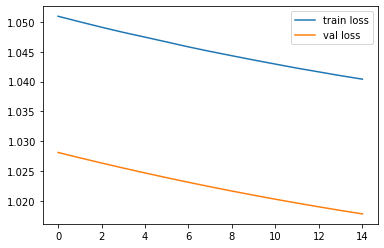

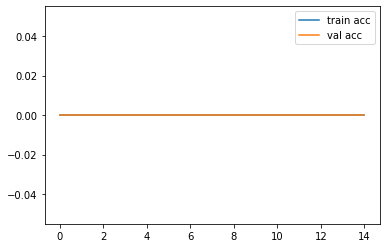

<Figure size 432x288 with 0 Axes>

In [11]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')